In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

df = pd.read_csv('../dataset/not_encoded_dataset.csv')


In [2]:
df['new_revenue_with_CPI'] = np.log1p(df['revenue_with_CPI'])

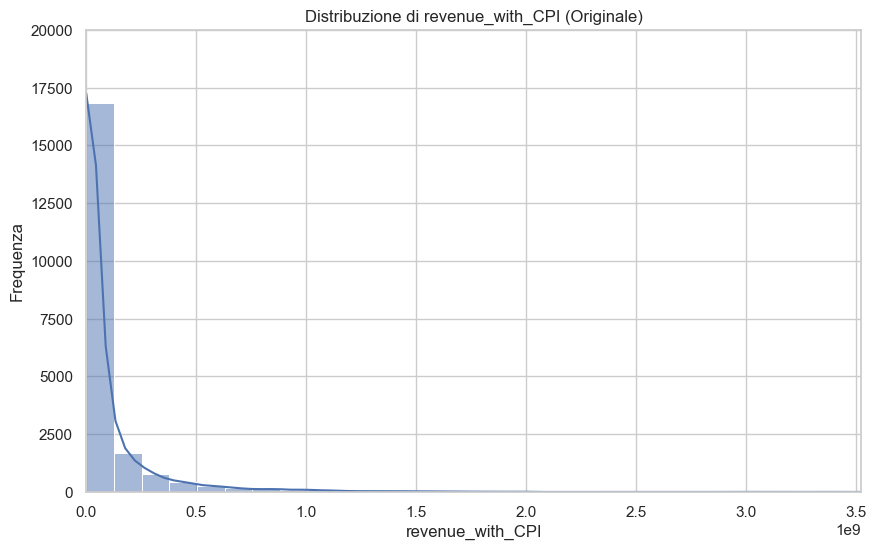

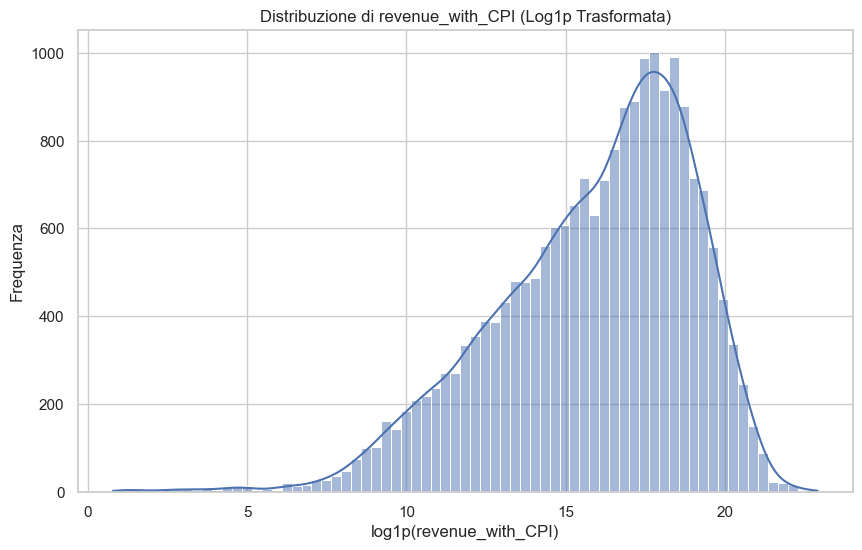

In [3]:

sns.set(style="whitegrid")

max_value = df['revenue_with_CPI'].max()
cut_off = max_value/2.5 

plt.figure(figsize=(10, 6))
sns.histplot(df['revenue_with_CPI'], bins=70, kde=True)
plt.title('Distribuzione di revenue_with_CPI (Originale)')
plt.xlabel('revenue_with_CPI')
plt.ylabel('Frequenza')
plt.xlim(0, cut_off)  
plt.ylim(0, 20000)   
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['new_revenue_with_CPI'], kde=True)
plt.title('Distribuzione di revenue_with_CPI (Log1p Trasformata)')
plt.xlabel('log1p(revenue_with_CPI)')
plt.ylabel('Frequenza')
plt.show()

Cluster 1 center: 16.57295694262528
Cluster 2 center: 13.539533108528358
Cluster 3 center: 19.0647679111263
Cluster 4 center: 9.734534347382375


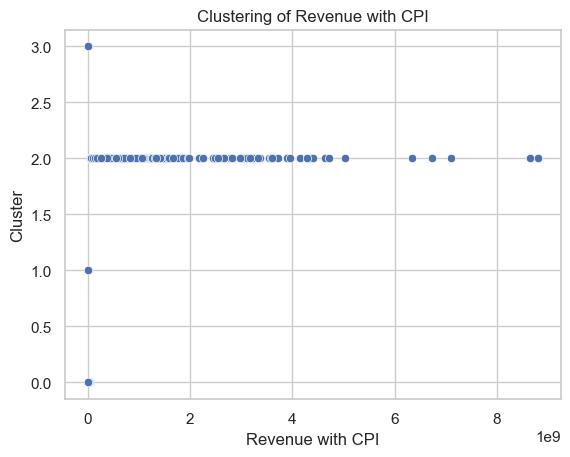

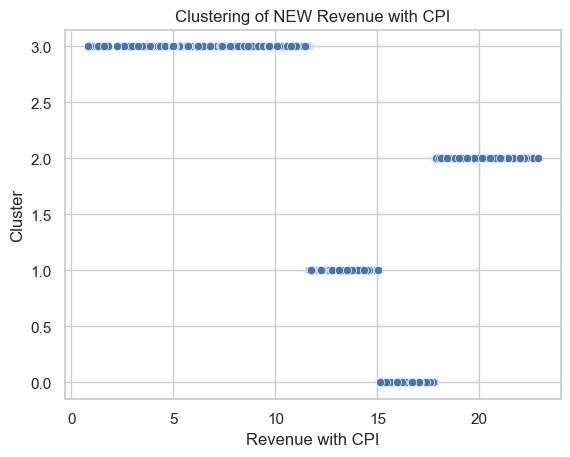

In [4]:

# number of clusters
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters,n_init=50, random_state=42, init='k-means++')
df['revenue_cluster'] = kmeans.fit_predict(df[['new_revenue_with_CPI']])
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center: {center[0]}")

sns.scatterplot(data=df, x='revenue_with_CPI', y='revenue_cluster')
plt.xlabel('Revenue with CPI')
plt.ylabel('Cluster')
plt.title('Clustering of Revenue with CPI')
plt.show()

sns.scatterplot(data=df, x='new_revenue_with_CPI', y='revenue_cluster')
plt.xlabel('Revenue with CPI')
plt.ylabel('Cluster')
plt.title('Clustering of NEW Revenue with CPI')
plt.show()




Cluster 0:
Mean silhouette: 0.5096095989767001
Number of samples: 7062

Cluster 1:
Mean silhouette: 0.5131132217038626
Number of samples: 5054

Cluster 2:
Mean silhouette: 0.5729488910324767
Number of samples: 6381

Cluster 3:
Mean silhouette: 0.5128276131398938
Number of samples: 2208


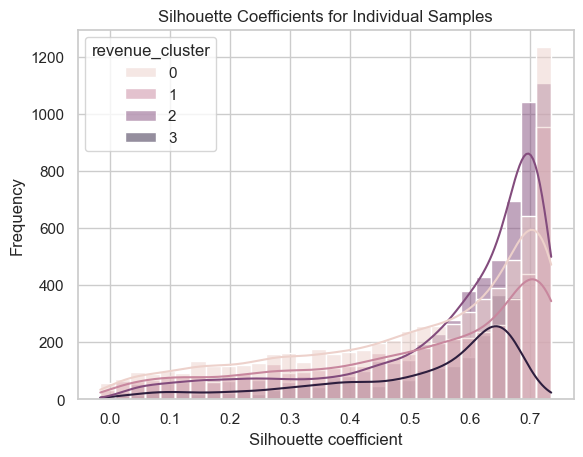

In [5]:

silhouette_samples_values = silhouette_samples(df[['new_revenue_with_CPI']], df['revenue_cluster'])

df['silhouette'] = silhouette_samples_values

for cluster in sorted(df['revenue_cluster'].unique()):
    cluster_silhouette_values = df[df['revenue_cluster'] == cluster]['silhouette']
    print(f"Cluster {cluster}:")
    print("Mean silhouette:", cluster_silhouette_values.mean())
    print("Number of samples:", cluster_silhouette_values.shape[0])
    print("")

sns.histplot(data=df, x='silhouette', hue='revenue_cluster', bins=30, kde=True)
plt.xlabel('Silhouette coefficient')
plt.ylabel('Frequency')
plt.title('Silhouette Coefficients for Individual Samples')
plt.show()


In [6]:

cluster_ranges = df.groupby('revenue_cluster')['revenue_with_CPI'].agg(['min', 'max', 'mean']).reset_index()
pd.options.display.float_format = '{:.2f}'.format 

print(cluster_ranges)

   revenue_cluster         min           max         mean
0                0  3458347.00   54779022.20  20728088.50
1                1   113341.70    3452707.50   1139944.75
2                2 54795903.10 8813184891.00 302608649.06
3                3        1.20     113087.10     36019.74


In [8]:
#dop revenue_with_CPI
df.drop(columns=['revenue_with_CPI'], inplace=True)
df.drop(columns=['new_revenue_with_CPI'], inplace=True)
df.drop(columns=['votes'], inplace=True)
df.drop(columns=['avg_vote'], inplace=True)
df.drop(columns=['silhouette'], inplace=True)

df.to_csv('../dataset/discretized_dataset.csv', index=False)